In [3]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier ,plot_tree




In [4]:
data = pd.read_csv("play_tennis.csv")
print("Dataset:")
display(data)

Dataset:


,Day,Outlook,Temperature,Humidity,Wind,Play
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Cloudy,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cool,Normal,Weak,Yes
5,6,Rain,Cool,Normal,Strong,No
6,7,Cloudy,Cool,Normal,Strong,Yes
7,8,Sunny,Mild,High,Weak,No
8,9,Sunny,Cool,Normal,Weak,Yes
9,10,Rain,Mild,Normal,Weak,Yes


In [5]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

print ("Features:")
display(X)
print("target:")
display(y)

Features:


,Day,Outlook,Temperature,Humidity,Wind
0,1,Sunny,Hot,High,Weak
1,2,Sunny,Hot,High,Strong
2,3,Cloudy,Hot,High,Weak
3,4,Rain,Mild,High,Weak
4,5,Rain,Cool,Normal,Weak
5,6,Rain,Cool,Normal,Strong
6,7,Cloudy,Cool,Normal,Strong
7,8,Sunny,Mild,High,Weak
8,9,Sunny,Cool,Normal,Weak
9,10,Rain,Mild,Normal,Weak


target:


0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play, dtype: object

In [6]:
def entropy (target_col):
    values , counts = np.unique(target_col , return_counts=True)
    entropy_value = 0

    for i in range(len(values)):
        probablity = counts[i] / np.sum(counts)
        entropy_value += -probablity * math.log2(probablity)
    return entropy_value    
    

In [7]:
total_entropy = entropy(y)
print("Total Entropy:", round(total_entropy, 4))


Total Entropy: 0.9403


In [8]:
def info_gain(data, split_attribute_name, target_name):
    total_entropy = entropy(data[target_name])
    
    values, counts = np.unique(data[split_attribute_name], return_counts=True)
    
    weighted_entropy = 0
    for i in range(len(values)):
        subset = data[data[split_attribute_name] == values[i]]
        weighted_entropy += (counts[i] / np.sum(counts)) * entropy(subset[target_name])
    
    information_gain = total_entropy - weighted_entropy
    return round(information_gain, 4)


In [9]:
def info_gain(data, split_attribute_name, target_name):
    total_entropy = entropy(data[target_name])
    
    values, counts = np.unique(data[split_attribute_name], return_counts=True)
    
    weighted_entropy = 0
    for i in range(len(values)):
        subset = data[data[split_attribute_name] == values[i]]
        weighted_entropy += (counts[i] / np.sum(counts)) * entropy(subset[target_name])
    
    information_gain = total_entropy - weighted_entropy
    return round(information_gain, 4)


Information Gain for each attribute:

Day = 0.9403
Outlook = 0.2467
Temperature = 0.0292
Humidity = 0.1518
Wind = 0.0481


In [10]:
IG_values = {
    feature: info_gain(data, feature, y.name)
    for feature in X.columns
    if feature != "Day"
}

root_node = max(IG_values, key=IG_values.get)
print("Root Node:", root_node)


Root Node: Outlook


In [11]:
print(f"\nChild nodes for root attribute '{root_node}':")

for value in data[root_node].unique():
    subset = data[data[root_node] == value]
    print(f"\n{root_node} = {value}")
    print(subset)



Child nodes for root attribute 'Outlook':

Outlook = Sunny
    Day Outlook Temperature Humidity    Wind Play
0     1   Sunny         Hot     High    Weak   No
1     2   Sunny         Hot     High  Strong   No
7     8   Sunny        Mild     High    Weak   No
8     9   Sunny        Cool   Normal    Weak  Yes
10   11   Sunny        Mild   Normal  Strong  Yes

Outlook = Cloudy
    Day Outlook Temperature Humidity    Wind Play
2     3  Cloudy         Hot     High    Weak  Yes
6     7  Cloudy        Cool   Normal  Strong  Yes
11   12  Cloudy        Mild     High  Strong  Yes
12   13  Cloudy         Hot   Normal    Weak  Yes

Outlook = Rain
    Day Outlook Temperature Humidity    Wind Play
3     4    Rain        Mild     High    Weak  Yes
4     5    Rain        Cool   Normal    Weak  Yes
5     6    Rain        Cool   Normal  Strong   No
9    10    Rain        Mild   Normal    Weak  Yes
13   14    Rain        Mild     High  Strong   No


In [14]:
from sklearn.preprocessing import LabelEncoder

encoded_data = data.copy()

le = LabelEncoder()
for col in encoded_data.columns:
    encoded_data[col] = le.fit_transform(encoded_data[col])


In [26]:

X_encoded = encoded_data.iloc[:, :-1]
y_encoded = encoded_data.iloc[:, -1]

print("Encoded Features (X):")
print(X_encoded.head())

print("\nEncoded Target (y):")
print(y_encoded.head())


Encoded Features (X):
   Day  Outlook  Temperature  Humidity  Wind
0    0        2            1         0     1
1    1        2            1         0     0
2    2        0            1         0     1
3    3        1            2         0     1
4    4        1            0         1     1

Encoded Target (y):
0    0
1    0
2    1
3    1
4    1
Name: Play, dtype: int64


In [37]:
# X_encoded should NOT contain Day or target
X_encoded = encoded_data.drop(columns=["Day", "Play"])
y_encoded = encoded_data["Play"]


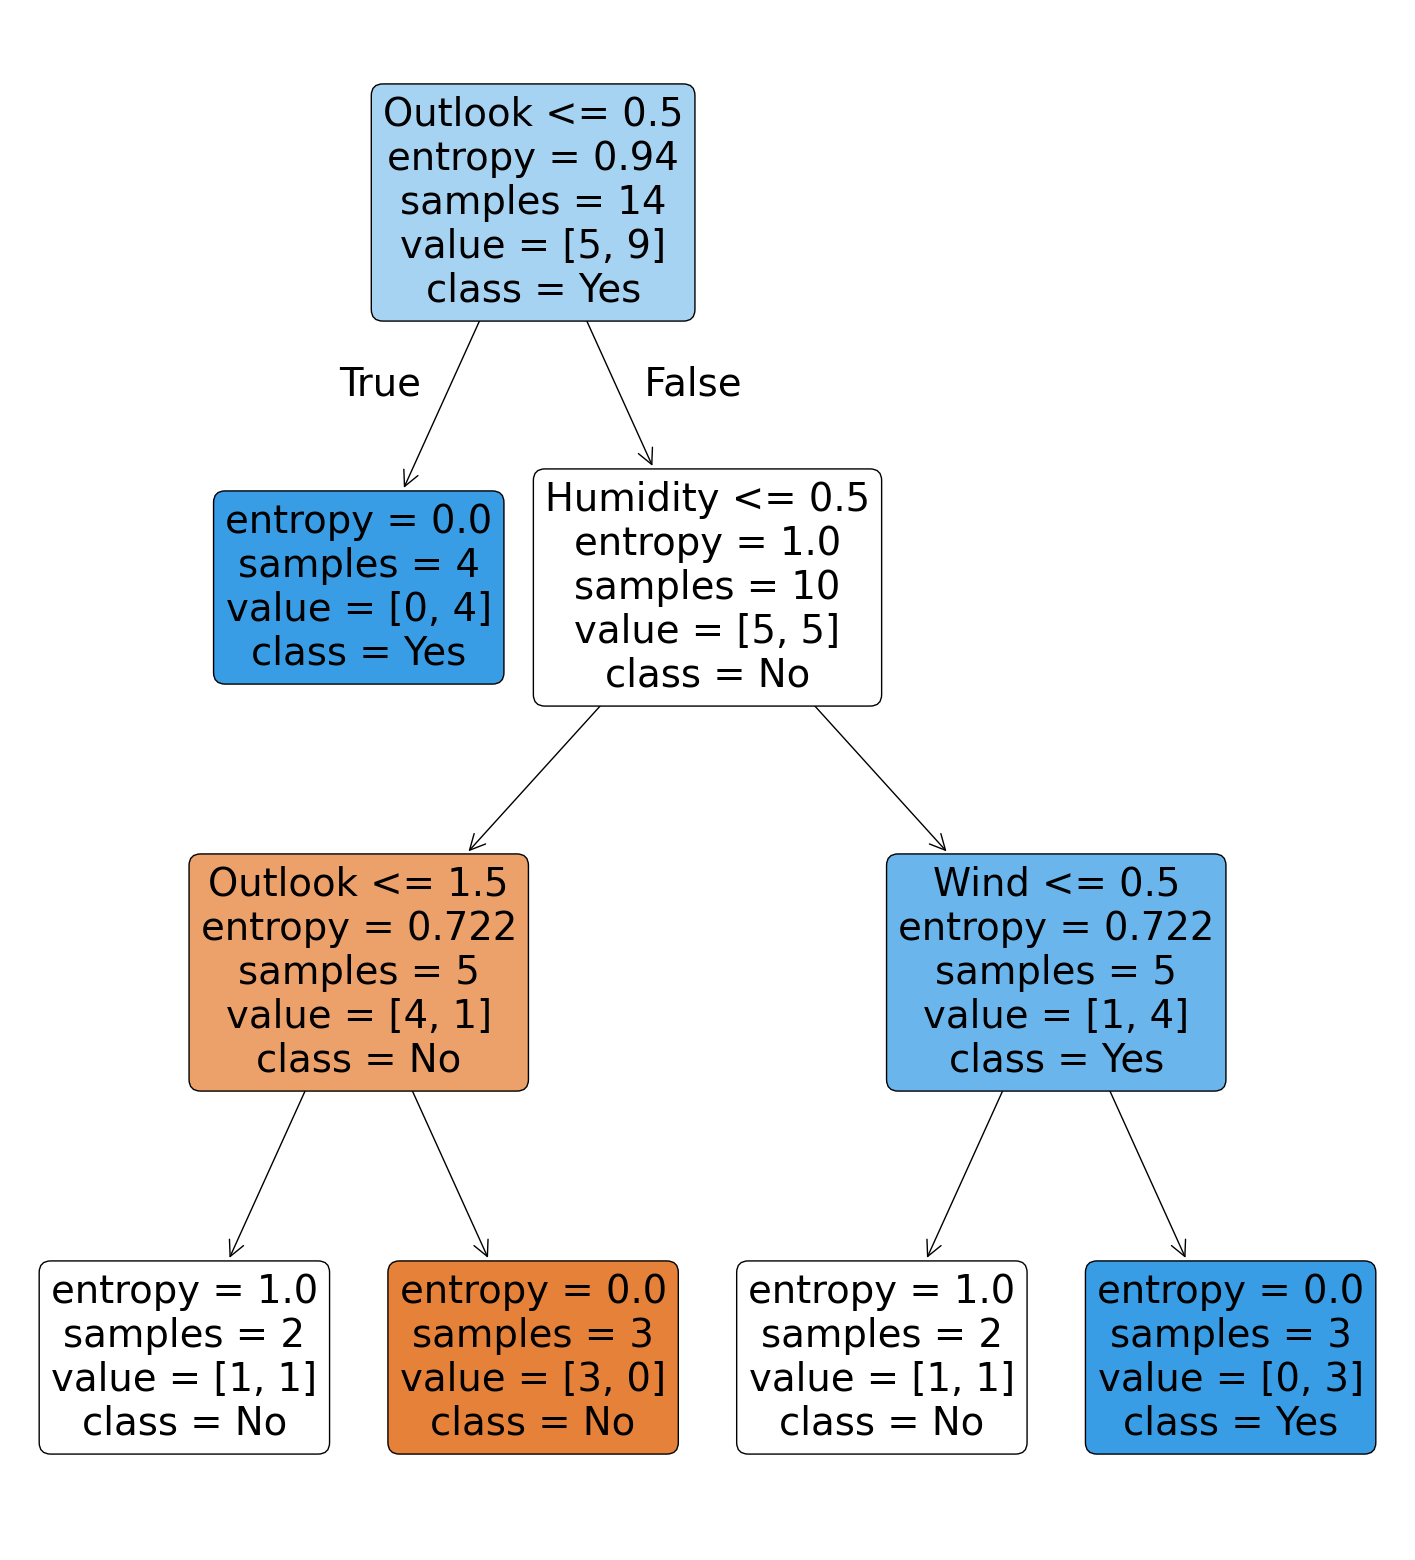

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train Decision Tree (entropy = ID3 criterion)
model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3,          # keeps tree clean like textbook
    random_state=0
)

model.fit(X_encoded, y_encoded)

# Plot tree
plt.figure(figsize=(18, 20))
plot_tree(
    model,
    feature_names=X_encoded.columns.tolist(),
    class_names=["No", "Yes"],
    filled=True,
    rounded=True
)
plt.show()
